In [74]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import argparse
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [75]:
#loading the data
df = pd.read_csv('NY-House-Dataset.csv')

df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [76]:
#checking the shape of the data
df.shape

(4801, 17)

In [77]:
#checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [78]:
#checking the missing values

missing_values = df.isnull().sum()

print(missing_values)


BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64


In [79]:
#descriptive statistics
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [80]:
#checking for duplicates and removing them

df.duplicated().sum()

df.drop_duplicates(inplace=True)

#checking the shape of the data
df.shape





(4587, 17)

In [81]:
# price analysis
df['PRICE'].describe()


count    4.587000e+03
mean     2.381172e+06
std      3.206831e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.498500e+06
max      2.147484e+09
Name: PRICE, dtype: float64

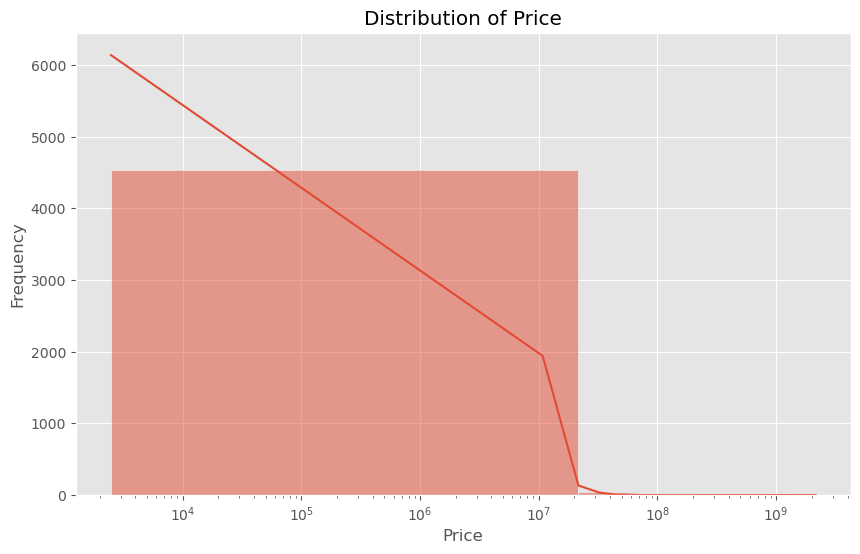

In [82]:
#Analyze the distribution of house prices

plt.figure(figsize=(10,6))
sns.histplot(df['PRICE'],bins=100,kde=True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.xscale('log') # using log scale due to wide range of prices
plt.show()

#Explain the analysis
#The distribution of price is right skewed. This means that most of the houses are in the lower price range.
#There are very few houses in the higher price range.
#The distribution of price is not normal.



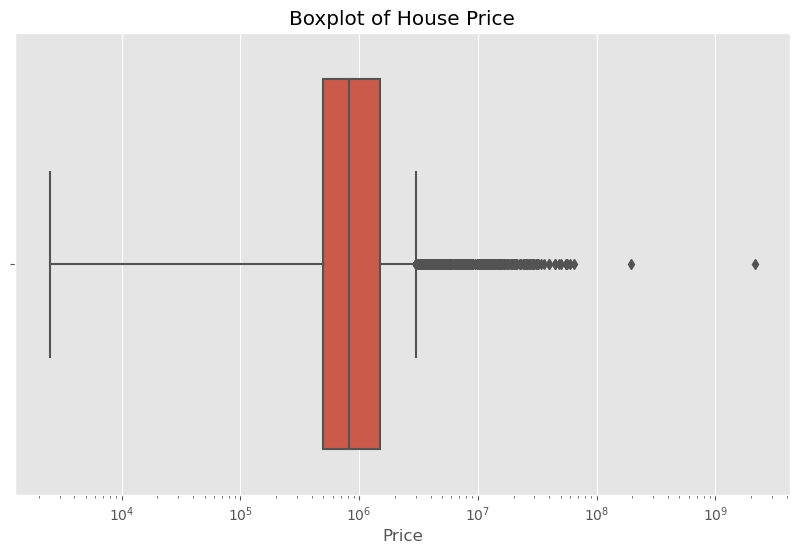

In [83]:
# indenfiying the outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['PRICE'])
plt.title("Boxplot of House Price")
plt.xlabel("Price")
plt.xscale('log')  # using log scale due to wide range of prices
plt.xlabel("Price")
plt.show()

#explaining the the boxplot
#The boxplot shows that there are many outliers in the price variable.
#The outliers are the houses with very high prices.
#The median price is around 400,000 dollars.
#The boxplot also shows that there are some houses with very low prices.




In [84]:
#removing the outliers
#removing the top 1% of the data
q = df['PRICE'].quantile(0.99)
df = df[df['PRICE']<q]
df.shape

(4540, 17)

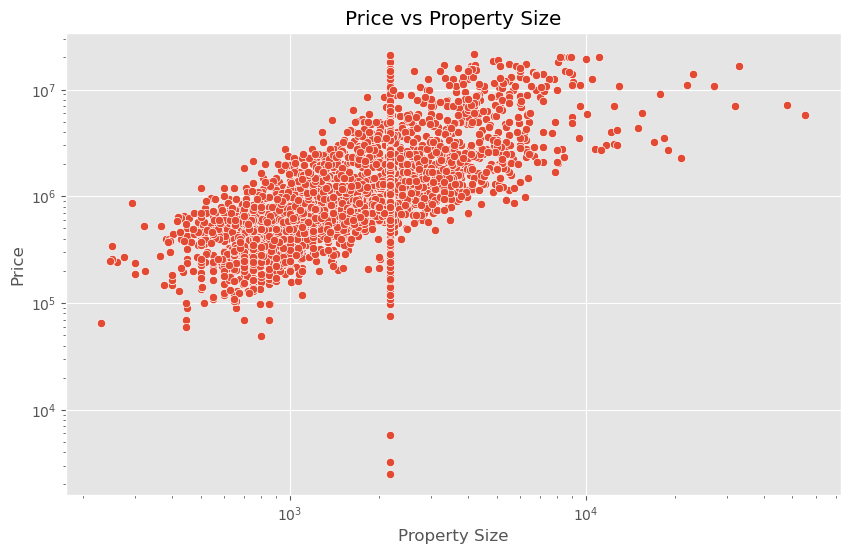

0.43557579612227787

In [87]:
#Property size analysis
#Exploring the relationship between the price and the size of the property

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['PROPERTYSQFT'],y=df['PRICE'])
plt.title("Price vs Property Size")
plt.xlabel("Property Size")
plt.ylabel("Price")
plt.xscale('log')  # using log scale due to wide range of prices
plt.yscale('log')  # using log scale due to wide range of prices
plt.show()

#explaining the analysis
#The scatter plot shows that there is a positive correlation between the price and the size of the property.
#The scatter plot also shows that there are some outliers in the data.
#The outliers are the houses with very high prices and very large sizes.
#The scatter plot also shows that there are some houses with very low prices and very small sizes.
#The scattter plot is not linear. This means that the relationship between the price and the size of the property is not linear.


#calculating the correlation between the price and the size of the property
correlation =df['PRICE'].corr(df['PROPERTYSQFT'])
correlation

#explaining the correlation
#The correlation between the price and the size of the property is 0.44.
#This shows that there is a positive correlation between the price and the size of the property.
#This means that as the size of the property increases, the price also increases.
#However, the correlation is not very strong.
#This means that the size of the property is not a very good predictor of the price.
# This means that the price of the property could be influenced by other factors as well.





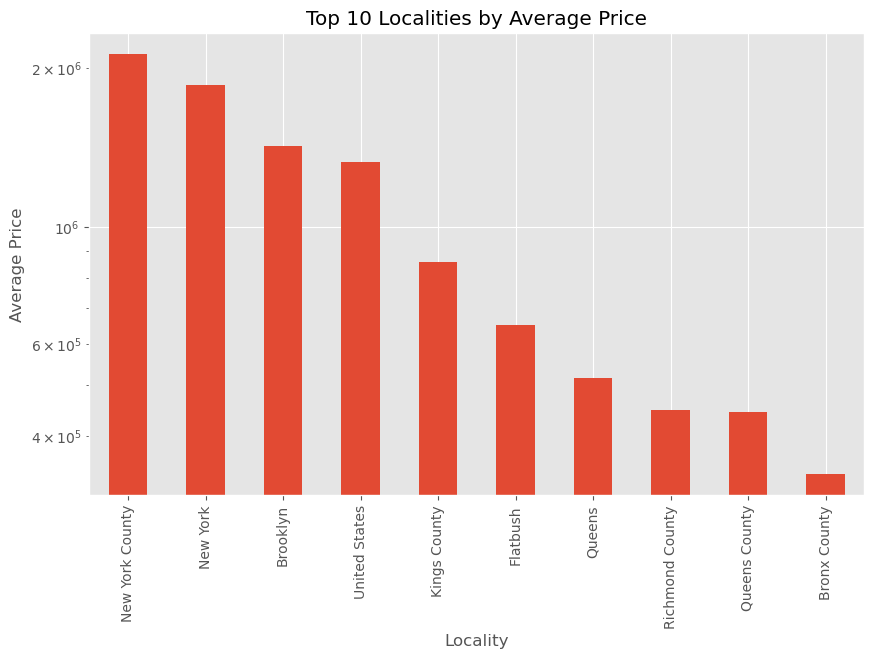

In [103]:
#Location based analysis
# Investigating geographical patterns in property prices
#Grouping properties by locatity and calculating average prices

df.groupby('LOCALITY')['PRICE'].mean().sort_values(ascending=False)

#plotting the top 10 localities by average price

plt.figure(figsize=(10,6))
df.groupby('LOCALITY')['PRICE'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Localities by Average Price")
plt.xlabel("Locality")
plt.ylabel("Average Price")
plt.yscale('log')  # using log scale due to wide range of prices
#plt.xticks(rotation=45)
plt.show()



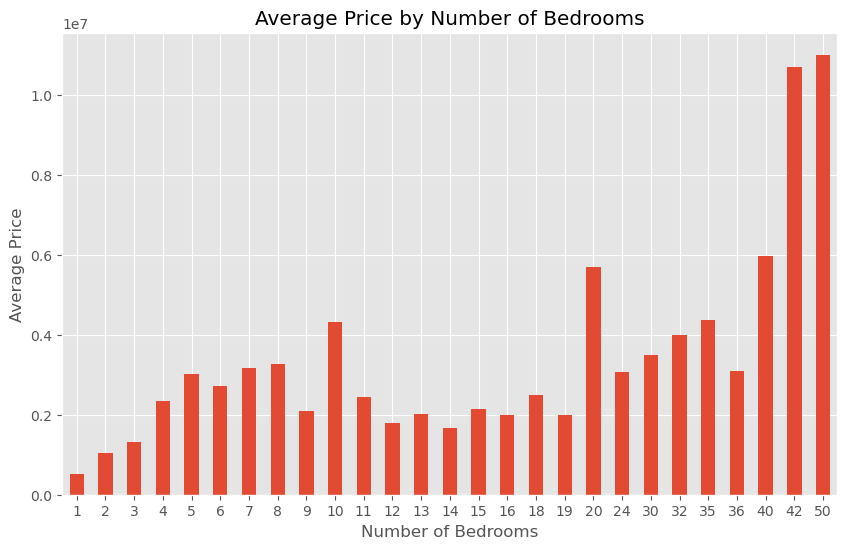

In [118]:
#plotting the average price by number of bedrooms

plt.figure(figsize=(10,6))
df.groupby('BEDS')['PRICE'].mean().plot(kind='bar')
plt.title("Average Price by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.xticks(rotation=0) 
plt.show()







Average House Prices by Number of Bedrooms:

The bar chart illustrates a general upward trend in average prices with an increase in the number of bedrooms. This indicates that properties with more bedrooms tend to be priced higher.
However, there is some fluctuation in this trend, particularly for properties with a very high number of bedrooms.

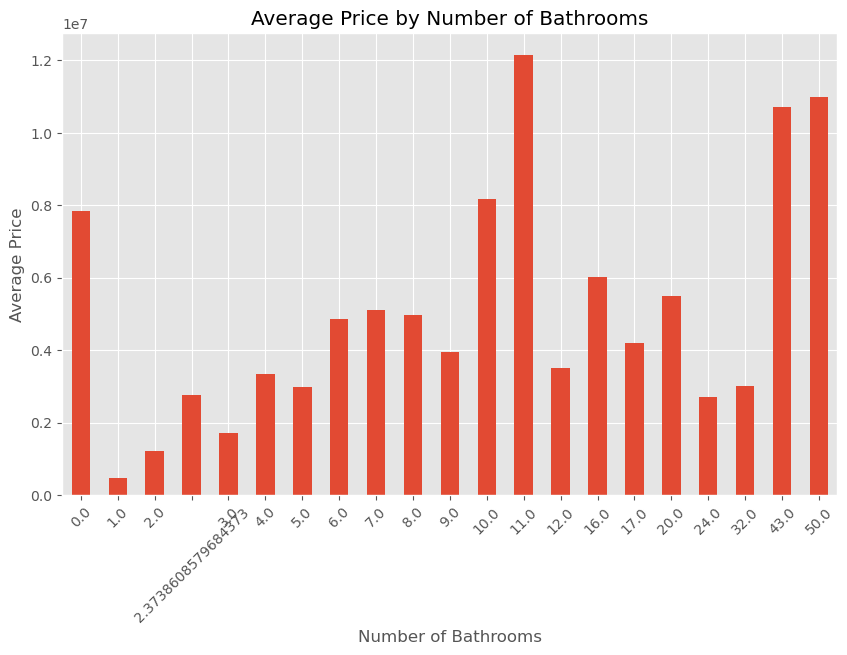

In [117]:
#plotting the average price by number of bathrooms

plt.figure(figsize=(10,6))
df.groupby('BATH')['PRICE'].mean().plot(kind='bar')
plt.title("Average Price by Number of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Average Price") 
plt.xticks(rotation=45)
plt.show()

Average House Prices by Number of Bathrooms:

Similarly, there's an increasing trend in average prices with the number of bathrooms. Properties with more bathrooms generally have higher average prices.
This trend also shows some inconsistencies, especially for properties with a very high number of bathrooms.

Insights from Bedroom and Bathroom Trends:

Impact on Prices: Both the number of bedrooms and bathrooms have a significant impact on property prices, with a general trend of higher prices for properties with more bedrooms and bathrooms.
Non-linear Trends: There are some non-linear trends observed, especially at the higher end of bedrooms and bathrooms, which might be due to the presence of luxury or unique properties.

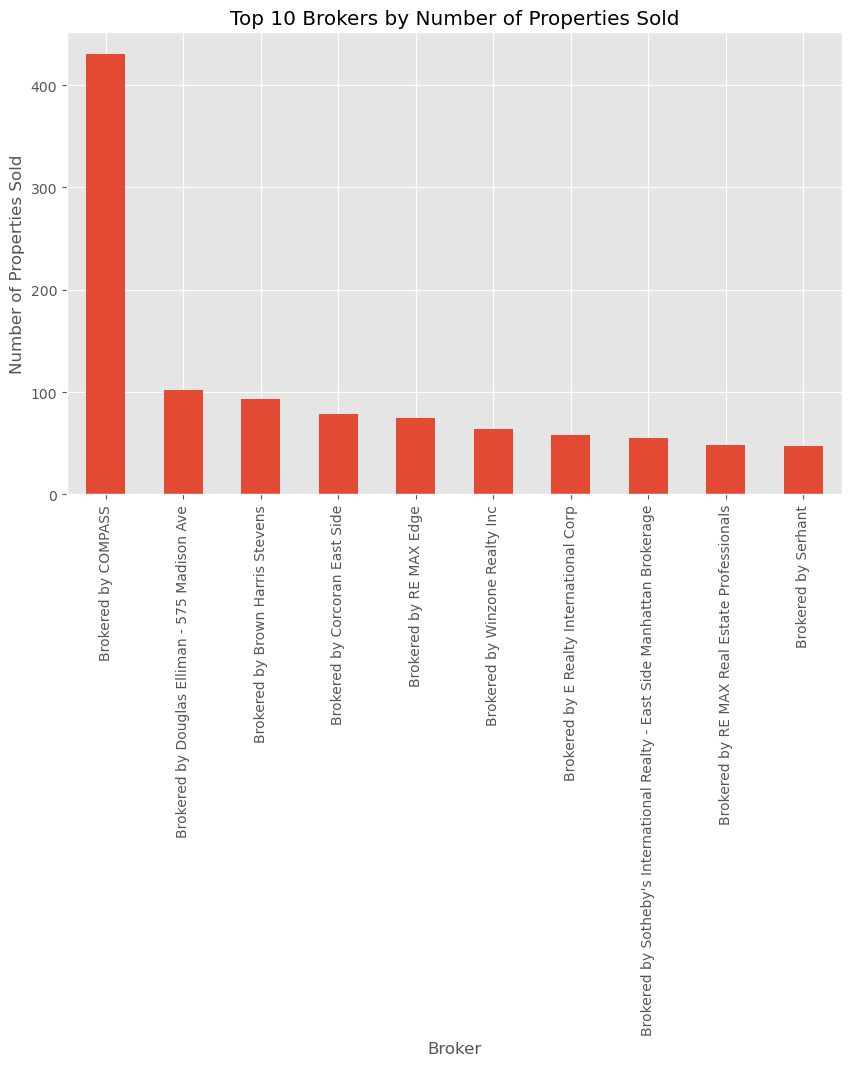

In [121]:
#Broker performance analysis
#Identifying the top 10 brokers by number of properties sold

plt.figure(figsize=(10,6))
df['BROKERTITLE'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Brokers by Number of Properties Sold")
plt.xlabel("Broker")
plt.ylabel("Number of Properties Sold")
plt.show()


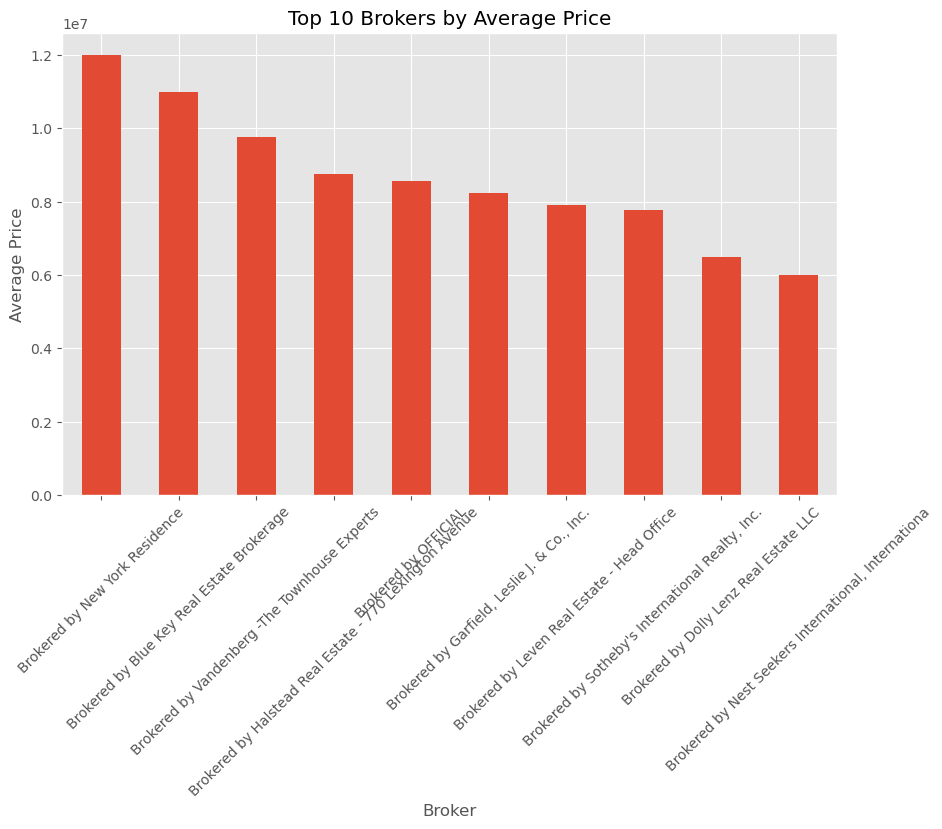

In [124]:
#Analyzing the performance of the top 10 brokers by average price

plt.figure(figsize=(10,6))
df.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Brokers by Average Price")
plt.xlabel("Broker")
plt.ylabel("Average Price")
#plt.yscale('log')  # using log scale due to wide range of prices
plt.xticks(rotation=45)
plt.show()

##### Insights from Broker Performance Analysis:

Variation Among Brokers: There is a noticeable variation in average prices among different brokers, suggesting that broker choice might have an influence on the pricing of properties.
High-End Brokers: Some brokers appear to specialize in higher-priced properties, which could indicate a focus on luxury or premium real estate markets.

**Conclusion**

This analysis provides insights into various aspects of the New York housing market, including price trends, the impact of property size, location influences, and the role of bedrooms/bathrooms in pricing. Additionally, it highlights how different brokers position themselves in the market.

In [1]:
# I should re look at analysis for bathrooms and bedrooms.